### RSM8413 - Group Assignment 2 - ebay Auction dataset - Python Source Code

In [20]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Data Preprocessing

In [21]:
#read data
ebay = pd.read_excel('ebayAuctions.xlsx', sheetname='eBay auctions')

In [22]:
ebay.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [23]:
#create dummy variables for categorical predictors: Category, Currency, Duration, EndDay
dcategory = pd.get_dummies(ebay, columns=['Category'], drop_first=True)


In [24]:
dcurrency = pd.get_dummies(dcategory, columns=['Currency'], drop_first=True)

In [25]:
dduration = pd.get_dummies(dcurrency, columns=['Duration'], drop_first=True)

In [26]:
ebaydata = pd.get_dummies(dduration, columns=['endDay'], drop_first=True)

In [27]:
ebaydata.head()

,sellerRating,ClosePrice,OpenPrice,Competitive,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,Duration_3,Duration_5,Duration_7,Duration_10,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


#### Seperate target from predictors

In [28]:
y = ebaydata.Competitive
X = ebaydata.drop('Competitive', axis=1)

#### Split into training and test datasets

In [29]:
#60% training and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8) 

#### Build Decision Tree Model for classification

In [30]:
#create Decision Tree Classifier object
tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50) #set minimum number of records in a terminal node to 50

#fit training dataset
tree = tree.fit(X_train, y_train)

#classify the validation set
y_pred = tree.predict(X_test)

#### Evaluate the model performance

In [31]:
#y_pred
tree.score(X_test, y_test)

0.8365019011406845

In [32]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[298,  65],
       [ 64, 362]])

In [33]:
#visualize the Decision Tree
tree_plot = export_graphviz(tree, out_file = None, feature_names = X_train.columns)
graph = graphviz.Source(tree_plot)
graph.render()

'Source.gv.pdf'

The Source.gv.pdf file contains the whole decision tree.

This model is not usable for prediciting the outcome of a new auction, as some variables in the decision tree cannot be known before the end of an auction.

These variables are:
* ClosePrice

Therefore, go back to the original dataset "ebay":

In [36]:
ebay.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [37]:
#drop the variables that cannot be known in advance of a new auction
mydata = ebay.drop(['ClosePrice'], axis=1)

In [38]:
#create dummy variables for categorical predictors: Category, Currency, Duration and endDay
dc = pd.get_dummies(mydata, columns=['Category'], drop_first=True)
dd = pd.get_dummies(dc, columns=['Duration'], drop_first=True)
de = pd.get_dummies(dd, columns=['endDay'], drop_first=True)
ebaynew = pd.get_dummies(de, columns=['Currency'], drop_first=True)

In [39]:
ebaynew.head()

,sellerRating,OpenPrice,Competitive,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,...,Duration_7,Duration_10,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Currency_GBP,Currency_US
0,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [40]:
y = ebaynew.Competitive
X = ebaynew.drop('Competitive', axis=1)

In [41]:
#60% training and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8) 

In [42]:
#create Decision Tree Classifier object
tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50) #set minimum number of records in a terminal node to 50

#fit training dataset
tree = tree.fit(X_train, y_train)

#classify the validation set
y_pred = tree.predict(X_test)

In [43]:
tree.score(X_test, y_test)

0.7376425855513308

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[286,  77],
       [130, 296]])

In [45]:
#visualize the Decision Tree
tree_plot = export_graphviz(tree, out_file = None, feature_names = X_train.columns)
graph = graphviz.Source(tree_plot)
graph.render()

'Source.gv.pdf'

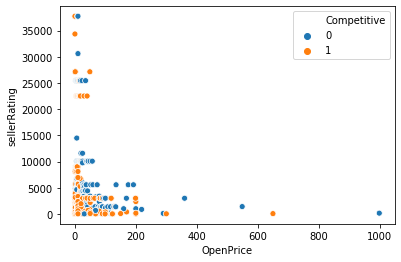

In [46]:
sns.scatterplot(x="OpenPrice", y="sellerRating", hue="Competitive", data = ebaynew)

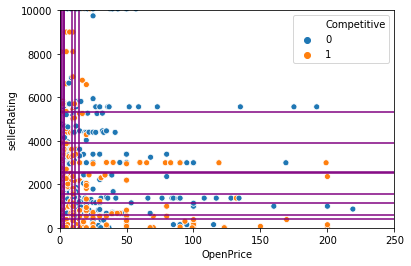

In [47]:
sns.scatterplot(x="OpenPrice", y="sellerRating", hue="Competitive", data = ebaynew)
plt.ylim(0, 10000)
plt.xlim(0, 250)
plt.axvline(x=3.615, color='purple')
plt.axvline(x=1.115, color='purple')
plt.axvline(x=8.95, color='purple')
plt.axvline(x=14.16, color='purple')
plt.axvline(x=1.74, color='purple')
plt.axvline(x=3.42, color='purple')
plt.axvline(x=11.5, color='purple')
plt.axhline(y=591.5, color='purple')
plt.axhline(y=2536.5, color='purple')
plt.axhline(y=2572.5, color='purple')
plt.axhline(y=384.5, color='purple')
plt.axhline(y=3909.5, color='purple')
plt.axhline(y=1533.0, color='purple')
plt.axhline(y=5310.5, color='purple')
plt.axhline(y=1147.0, color='purple')
plt.show()

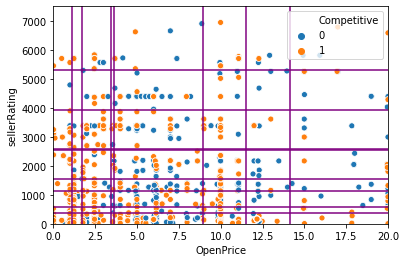

In [48]:
sns.scatterplot(x="OpenPrice", y="sellerRating", hue="Competitive", data = ebaynew)
plt.ylim(0, 7500)
plt.xlim(0, 20)
plt.axvline(x=3.615, color='purple')
plt.axvline(x=1.115, color='purple')
plt.axvline(x=8.95, color='purple')
plt.axvline(x=14.16, color='purple')
plt.axvline(x=1.74, color='purple')
plt.axvline(x=3.42, color='purple')
plt.axvline(x=11.5, color='purple')
plt.axhline(y=591.5, color='purple')
plt.axhline(y=2536.5, color='purple')
plt.axhline(y=2572.5, color='purple')
plt.axhline(y=384.5, color='purple')
plt.axhline(y=3909.5, color='purple')
plt.axhline(y=1533.0, color='purple')
plt.axhline(y=5310.5, color='purple')
plt.axhline(y=1147.0, color='purple')
plt.show()